In [2]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from IPython.display import Image
from tensorflow.keras.utils import plot_model

In [3]:
K.clear_session()


def cnn_model(img):
    
    conv_1 = Conv2D(16, (7, 7), activation='relu', padding='same', strides=1)(img)
    conv_1 = Conv2D(32, (5, 5), activation='relu', padding='same', strides=1)(conv_1)
    conv_1 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(conv_1)

    conv_2 = Conv2D(32, (5, 5), activation='relu', padding='same', strides=1)(img)
    conv_2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(conv_2)

    add_1 = tf.keras.layers.Add()([conv_1, conv_2])

    conv_4 = Conv2D(16, (7, 7), activation='relu', padding='same', strides=1)(add_1)
    conv_5 = Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(conv_4)

    add_2 = tf.keras.layers.Add()([conv_4, conv_5])

    conv_6 = Conv2D(3, (3, 3), activation='relu', padding='same', strides=1)(add_2)

    return conv_6
    

In [6]:
d_path = '/content/drive/MyDrive/UnderwaterImageEnhancement/dataset/train-set/raw'
t_path = '/content/drive/MyDrive/UnderwaterImageEnhancement/dataset/train-set/reference'

data = []
target = []

for imagePath in os.listdir(d_path):

    # get full the path of the raw(real) and reference(target) images
    input_path = os.path.join(d_path, imagePath)
    target_path = os.path.join(t_path, imagePath)

    #read the images
    img = cv2.imread(input_path)
    target_img = cv2.imread(target_path)

    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

    #resize the images into 112 x 112 
    img = cv2.resize(img, (112, 112))
    target_img = cv2.resize(target_img, (112, 112))

    # put the images into array
    data.append(img)
    target.append(target_img)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# convert arrays into numpy arrays
data = np.array(data)
target = np.array(target)

print(data.shape, target.shape)

(712, 112, 112, 3) (712, 112, 112, 3)


In [ ]:
%cd '/content/drive/MyDrive/UnderwaterImageEnhancement/models/npfile-model1/'

np.save('data', data)
np.save('target', target)

/content/drive/MyDrive/UnderwaterImageEnhancement/models/npfile-model1


In [ ]:
%cd '/content/drive/MyDrive/UnderwaterImageEnhancement/models/npfile-model1/'

data = np.load('data.npy')
target = np.load('target.npy')

print(data.shape, target.shape)

/content/drive/MyDrive/UnderwaterImageEnhancement/models/npfile-model1
(712, 112, 112, 3) (712, 112, 112, 3)


In [ ]:
input_sample = Input(shape=(112, 112, 3))
output_ = cnn_model(input_sample)
model_enhancer = Model(inputs=input_sample, outputs=output_)
model_enhancer.compile(loss='mse', optimizer='adam', metrics=['mse', 'accuracy'])
model_enhancer.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 16) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 32) 12832       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 112, 112, 32) 2432        input_1[0][0]                    
______________________________________________________________________________________________

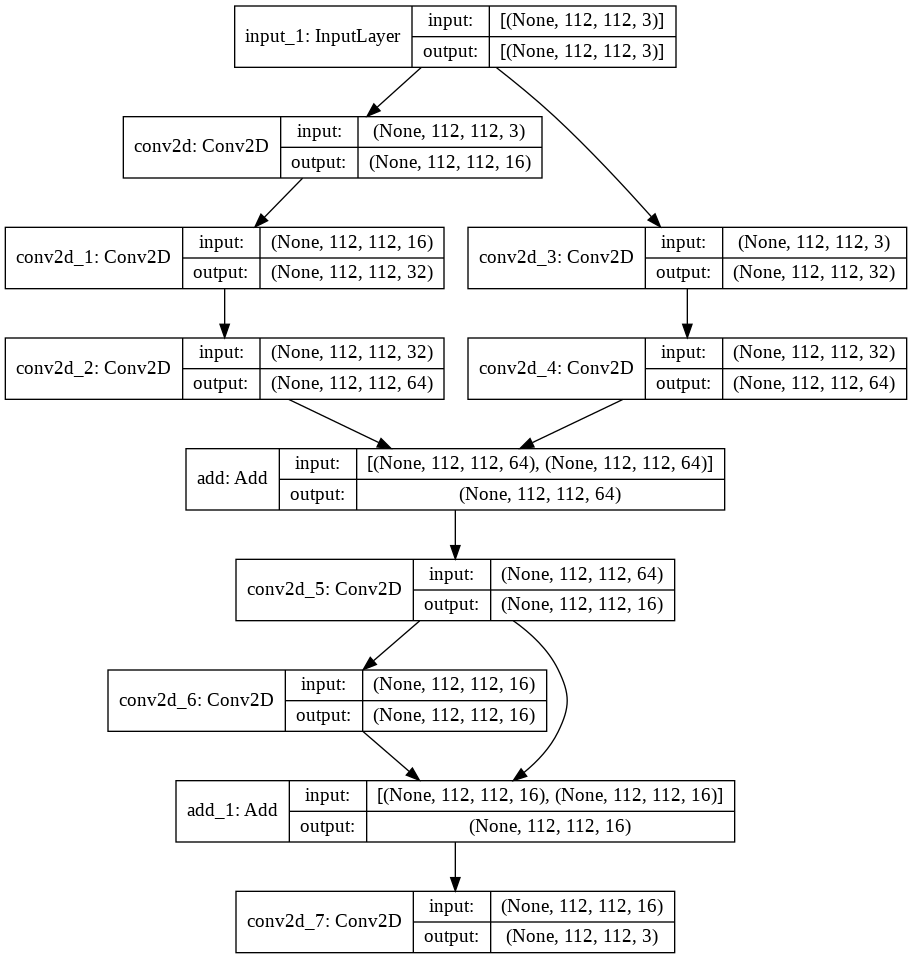

In [ ]:
plot_model(model_enhancer, to_file='/content/drive/MyDrive/UnderwaterImageEnhancement/models/model1_view.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='/content/drive/MyDrive/UnderwaterImageEnhancement/models/model1_view.png')

In [ ]:
# split train dataset into 80% for training and 20% for validation
train_data, val_data, train_target, val_target = train_test_split(data, target, test_size=0.2)

print(len(train_data), len(train_target),len(val_data), len(val_target) )

569 569 143 143


In [ ]:
epoch = 100

checkpoint = ModelCheckpoint('/content/drive/MyDrive/UnderwaterImageEnhancement/checkpoints/model1/model-{epoch:03d}.h5', monitor="val_loss", save_best_only=False, mode='auto', save_freq=epoch)

history = model_enhancer.fit(train_data, train_target, validation_data=(val_data, val_target), batch_size=16, epochs=epoch, callbacks=[checkpoint])

Epoch 1/100
36/36 [==============================] - 36s 146ms/step - loss: 11898.4102 - mse: 11898.4121 - accuracy: 0.2548 - val_loss: 7176.4849 - val_mse: 7176.4839 - val_accuracy: 0.2676
Epoch 2/100
36/36 [==============================] - 3s 96ms/step - loss: 3388.2141 - mse: 3388.2136 - accuracy: 0.4298 - val_loss: 2353.4961 - val_mse: 2353.4963 - val_accuracy: 0.4290
Epoch 3/100
29/36 [=======================>......] - ETA: 0s - loss: 2417.7424 - mse: 2417.7424 - accuracy: 0.3491

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


36/36 [==============================] - 4s 115ms/step - loss: 2356.8848 - mse: 2356.8850 - accuracy: 0.3676 - val_loss: 2109.1306 - val_mse: 2109.1306 - val_accuracy: 0.5096
Epoch 4/100
36/36 [==============================] - 3s 96ms/step - loss: 2087.7283 - mse: 2087.7283 - accuracy: 0.5267 - val_loss: 1839.9637 - val_mse: 1839.9636 - val_accuracy: 0.5233
Epoch 5/100
36/36 [==============================] - 3s 96ms/step - loss: 2060.7139 - mse: 2060.7139 - accuracy: 0.5400 - val_loss: 1844.1901 - val_mse: 1844.1901 - val_accuracy: 0.5318
Epoch 6/100
36/36 [==============================] - 4s 100ms/step - loss: 1885.1582 - mse: 1885.1580 - accuracy: 0.5604 - val_loss: 1844.9738 - val_mse: 1844.9739 - val_accuracy: 0.5453
Epoch 7/100
36/36 [==============================] - 3s 97ms/step - loss: 1792.0486 - mse: 1792.0483 - accuracy: 0.5644 - val_loss: 1735.5767 - val_mse: 1735.5767 - val_accuracy: 0.5517
Epoch 8/100
36/36 [==============================] - 3s 97ms/step - loss: 1787.7

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])


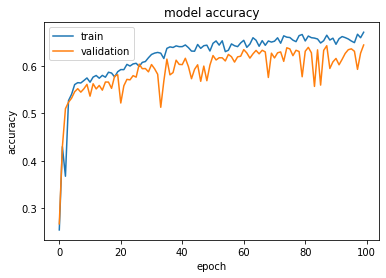

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

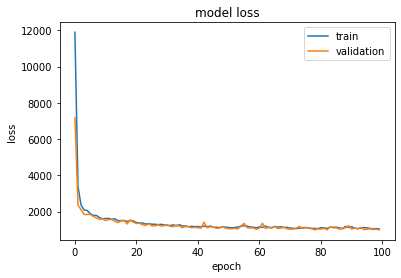

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
val_loss, val_mse, val_accuracy = model_enhancer.evaluate(val_data, val_target, verbose=2)
print("validation loss", val_loss)
print("MSE for validation:", val_mse)
print("validation accuracy:", val_accuracy)

5/5 - 1s - loss: 989.3912 - mse: 989.3912 - accuracy: 0.6436
validation loss 989.3911743164062
MSE for validation: 989.3911743164062
validation accuracy: 0.6435579061508179


In [ ]:
import numpy as np
from PIL import Image
import cv2
import os
from matplotlib import pyplot as plt


test_path = '/content/drive/MyDrive/UnderwaterImageEnhancement/dataset/test-set/raw/'
destination = '/content/drive/MyDrive/UnderwaterImageEnhancement/dataset/test-set/model1-output/'

for test_img_name in os.listdir(test_path):

    #read the raw images
    test_img = cv2.imread(os.path.join(test_path, test_img_name))
   
    #resize the images into 112 x 112 
    test_img = cv2.resize(test_img, (112, 112))
    
    test_img = test_img.reshape(1,112,112,3)

    result = model_enhancer.predict(test_img)
    result = result.squeeze()
    
    test_img = test_img.squeeze()
    test_img[:,:,:] = result[:,:,:]
    #plt.imshow(test_img)
    cv2.imwrite(os.path.join(destination, test_img_name), test_img)
